# K Means Clustering - 3

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [ ]:
df = pd.read_csv('College_Data', index_col = 0)
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [ ]:
# EDA

df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

## Plots

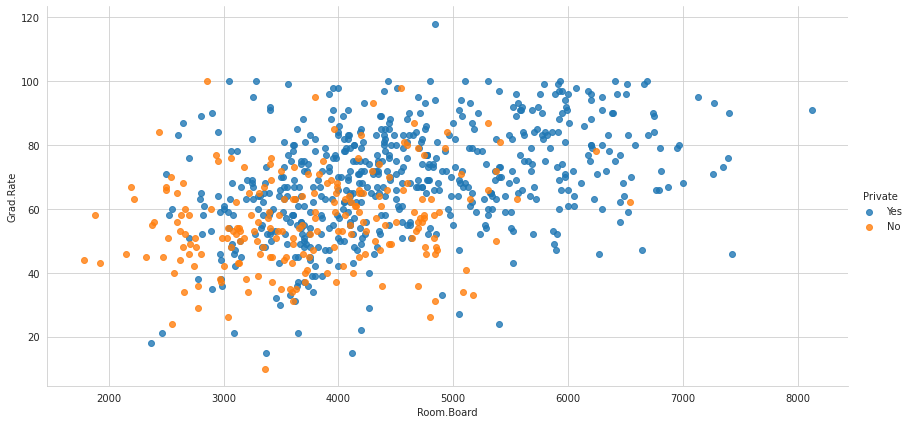

In [ ]:
# Room.Board vs Grad.Rate

sns.set_style("whitegrid")
sns.lmplot(x = 'Room.Board', y = 'Grad.Rate', data = df, hue = 'Private', fit_reg = False, height = 6, aspect = 2)

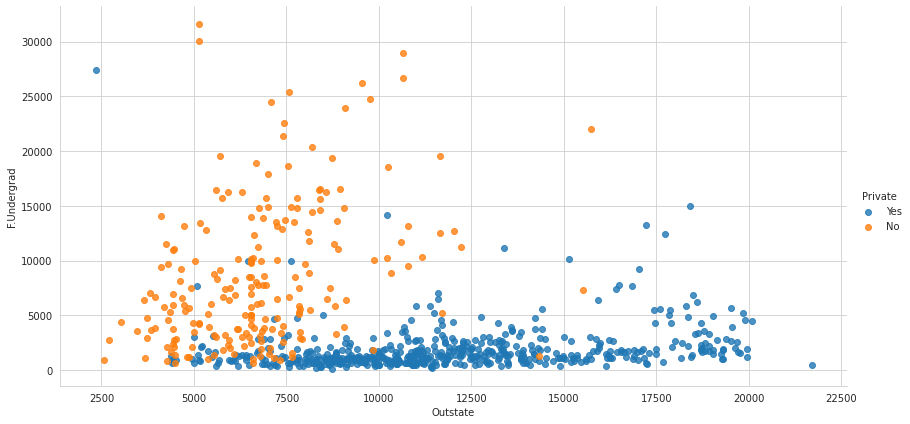

In [ ]:
# Outstate vs F.Undergrad

sns.set_style("whitegrid")
sns.lmplot(x = 'Outstate', y = 'F.Undergrad', data = df, hue = 'Private', fit_reg = False, height = 6, aspect = 2)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


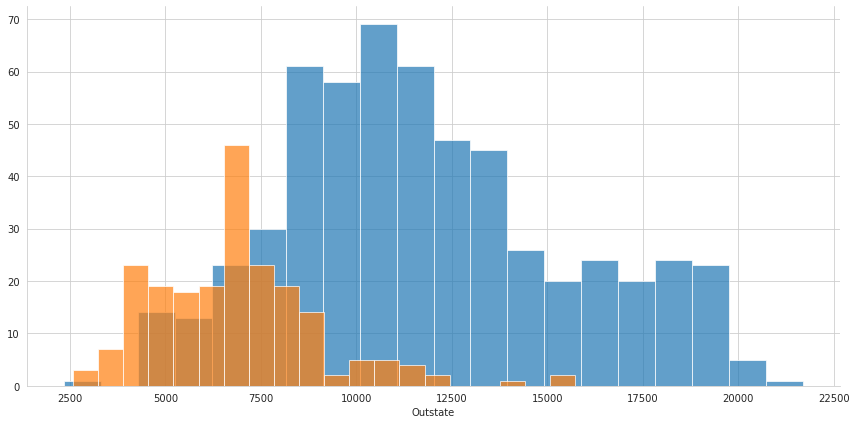

In [ ]:
# FacetGrid (SNS) - for Outstate

g = sns.FacetGrid(df, hue = 'Private', size = 6, aspect = 2)
g = g.map(plt.hist, 'Outstate', bins = 20, alpha = 0.7)

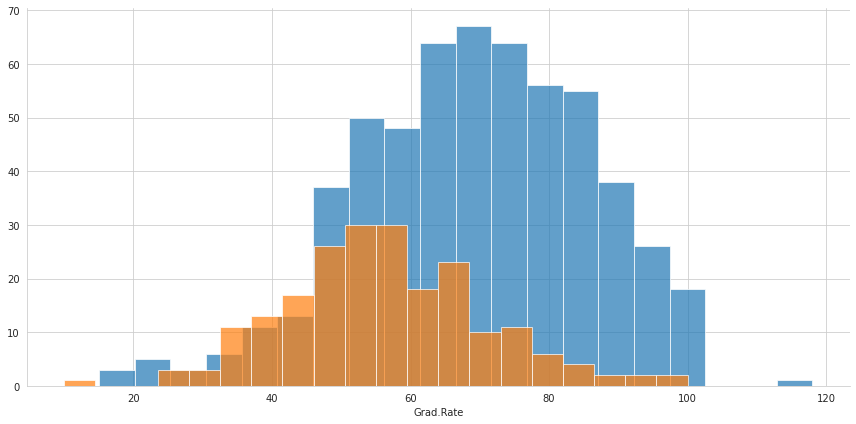

In [ ]:
# FacetGrid (SNS) - for Grad.Rate, there is an erroneous value of more than 100 of graduation rate

g = sns.FacetGrid(df, hue = 'Private', height = 6, aspect = 2)
g = g.map(plt.hist, 'Grad.Rate', bins = 20, alpha = 0.7)

In [ ]:
# Find the erroneous value

df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [ ]:
# Correct the data

df['Grad.Rate']['Cazenovia College'] = 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## K - Means Cluster

In [ ]:
# Import

from sklearn.cluster import KMeans

In [ ]:
# Instance

model = KMeans(n_clusters = 2, random_state = 101)

In [ ]:
# Fit, Remember no Train-Test Split, This is Unsupervised Learning

model.fit(df.drop('Private', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
# Identified Clusters

X = df.loc[:,['Outstate','F.Undergrad']]

identified_clusters = model.fit_predict(X)

In [ ]:
# Cluster Center Vectors

model.cluster_centers_

array([[10944.04255319,  1963.38753799],
       [ 7657.31092437, 13301.84033613]])

## Evaluation
   
   - Remember, there is no perfect way to evaluate clustering if you don't have the labels, however, since we do have, we take advantage of this to evaluate our clusters.

   - But keep in mind that you do not have this luxury in the real world

In [ ]:
# Create a df called 'Cluster' 0 for Private, 1 for Public School
# Instead of using replace, let us use a function and apply method

def converter(private):

  if (private == 'Yes'):

    return 0

  else:

    return 1
  

In [ ]:
# Create a df['Cluster']

df['Cluster'] = df['Private'].apply(converter)
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [ ]:
# Create a df['Model Label']

df['Model Label'] = model.labels_
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,Model Label
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,0


### Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Confusion Matrix

print(confusion_matrix(df['Cluster'], model.labels_))

[[555  10]
 [103 109]]


In [ ]:
# Classification Report

print(classification_report(df['Cluster'], model.labels_))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       565
           1       0.92      0.51      0.66       212

    accuracy                           0.85       777
   macro avg       0.88      0.75      0.78       777
weighted avg       0.86      0.85      0.84       777



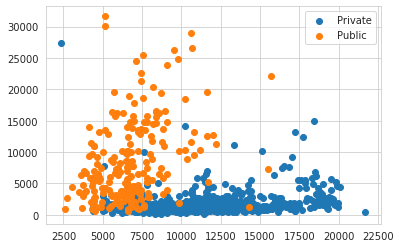

In [ ]:
# Plot (Orig)

filtered_label_0 = df[df['Cluster'] == 0]
filtered_label_1 = df[df['Cluster'] == 1]


plt.scatter(filtered_label_0.loc[:,'Outstate'], filtered_label_0.loc[:,'F.Undergrad'], label = 'Private')
plt.scatter(filtered_label_1.loc[:,'Outstate'], filtered_label_1.loc[:,'F.Undergrad'], label = 'Public')
plt.legend()


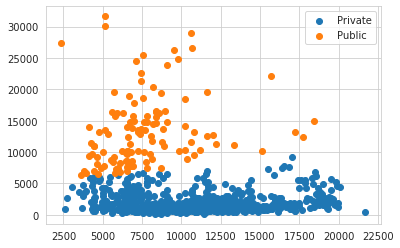

In [ ]:
# Plot (Clustered)


filtered_label_0 = df[df['Model Label'] == 0]
filtered_label_1 = df[df['Model Label'] == 1]


plt.scatter(filtered_label_0.loc[:,'Outstate'], filtered_label_0.loc[:,'F.Undergrad'], label = 'Private')
plt.scatter(filtered_label_1.loc[:,'Outstate'], filtered_label_1.loc[:,'F.Undergrad'], label = 'Public')
plt.legend()

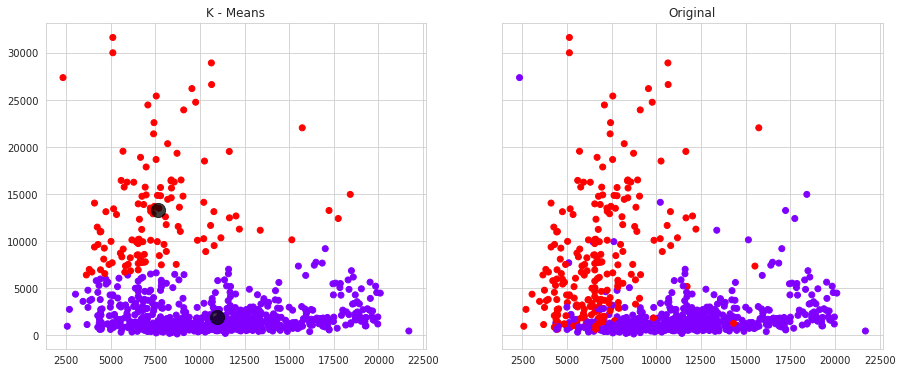

In [ ]:
# In one Graph for Comparison

centroid = model.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (15,6))

ax1.set_title('K - Means')
ax1.scatter(df['Outstate'], df['F.Undergrad'], c = model.labels_, cmap = 'rainbow')
ax1.scatter(centroid[:,0], centroid[:,1], c = 'k', marker = 'o', alpha = 0.75, s = 200)
ax1.grid(True)

ax2.set_title('Original')
ax2.scatter(df['Outstate'], df['F.Undergrad'], c = df['Cluster'], cmap = 'rainbow')
ax2.grid(True)

plt.show()

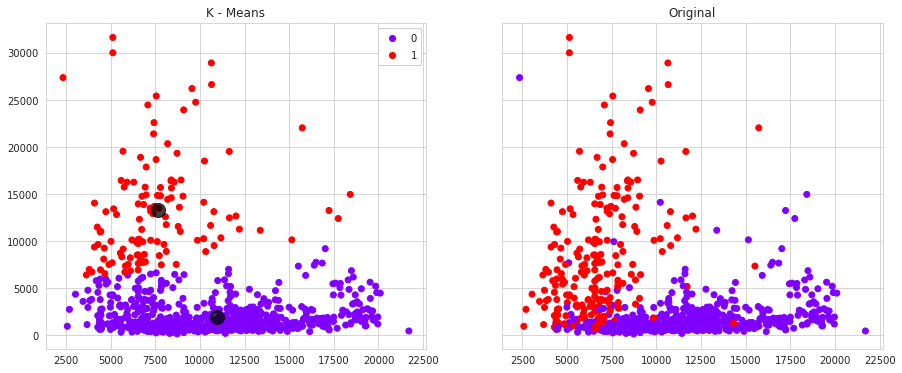

In [ ]:
# In one Graph for Comparison (With Legend)

centroid = model.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (15,6))

scatter = ax1.scatter(df['Outstate'], df['F.Undergrad'], c = model.labels_, cmap = 'rainbow')  # assign to a variable

legend1 = ax1.legend(*scatter.legend_elements())
handles, labels = scatter.legend_elements(prop = 'sizes', alpha = 0.6)

ax1.set_title('K - Means')
ax1.add_artist(legend1) # add legend to ax1
ax1.scatter(centroid[:,0], centroid[:,1], c = 'k', marker = 'o', alpha = 0.75, s = 200)
ax1.grid(True)

ax2.set_title('Original')
ax2.scatter(df['Outstate'], df['F.Undergrad'], c = df['Cluster'], cmap = 'rainbow')
ax2.grid(True)

plt.show()